In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

к примеру: $$y = -8x+15$$ Возьмем выборку случайным образом распределенных вокруг этой прямой точек.

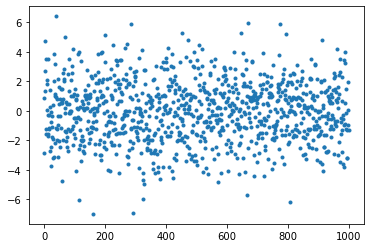

In [2]:
x = 2*np.random.randn(1000,1)# sigma*np.random.randn(numb,ax)
plt.plot(x,'.')


In [3]:
y = 15 - 8*x +7* np.random.randn(1000,1)

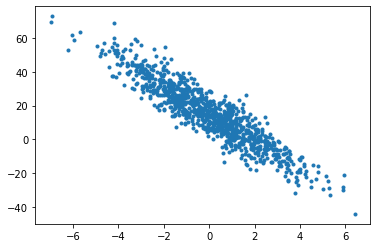

In [4]:
plt.plot(x,y,'.')

#определим функц. для вычисления MSE

In [5]:
def mse(X,Y,param):
    N = len(Y)
    predictions = X.dot(param)#X придется задать как двумерный массив. для того,чтобы param[0] был умножен на 1(меньше кода)
    #вычислим mean squared error
    return ((np.sum(np.square(predictions-Y)))/N)
    

ГРАДИНТНЫЙ СПУСК

In [17]:
def grad_descent(X,Y,param,num_iter = 1000, lern_par=0.5):
    N = len(Y)
    mse_prev = np.zeros(num_iter)
    param_prev = np.zeros((num_iter,2))
    for i in range(num_iter):
        pred = np.dot(X,param)
        #print(pred)
        param = param - ((lern_par*(X.T.dot((pred-Y)))*2)/N)
        param_prev[i,:] = param.T
        mse_prev[i] = mse(X,Y,param)
    return param, mse_prev, param_prev

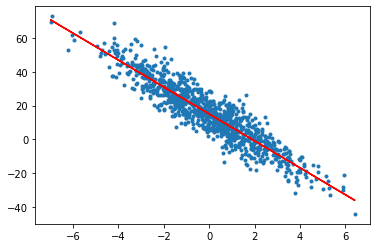

In [18]:
lern_par = 0.01
num_iter = 1000
Y_resh= []
param = np.random.randn(2,1)
X_resh = np.c_[np.ones((len(x),1)),x]
parameters, mse1, param1 = grad_descent(X_resh,y,param,num_iter,lern_par)
X_R = []
for i in range(len(X_resh)):
    X_R = np.append(X_R,X_resh[i][1])
plt.plot(x,y,'.')
Y_resh = parameters[1][0]*X_R+parameters[0][0]
plt.plot(X_R,Y_resh,'r')

plt.show()

СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК

In [19]:
def stoc_gradient(X,Y,param,num_iter=1000,learn_par=0.5):
    N = len(Y)
    mse_prev = np.zeros(num_iter)
    for i in range(num_iter):
        mse_t = 0.0
        for j in range(N):
            val_rand = np.random.randint(0,N)
            X_res = X[val_rand,:].reshape(1,X.shape[1])
            Y_res = Y[val_rand].reshape(1,1)
            pred = np.dot(X_res,param)
            
            param = param - ((lern_par*(X_res.T.dot((pred-Y_res)))*2)/N)
            mse_t +=mse(X_res,Y_res,param)
        mse_prev[i] = mse_t
    return param, mse_prev

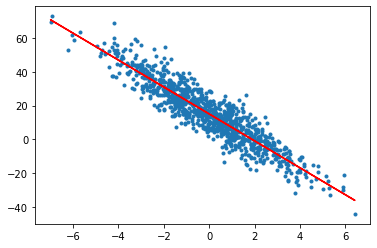

In [20]:
param2 = np.random.randn(2,1)
X_resh2 = np.c_[np.ones((len(x),1)),x]
parameters_stoc,mse_stoc = stoc_gradient(X_resh2,y,param2)
X_R2 = []
for i in range(len(X_resh)):
    X_R2 = np.append(X_R2,X_resh[i][1])
Y_resh2 = parameters_stoc[1][0]*X_R2+parameters_stoc[0][0]
plt.plot(x,y,'.')
plt.plot(X_R2,Y_resh2,'r')
plt.show()

In [21]:
print(parameters)
print("\n")
print(parameters_stoc)

[[15.02516216]
 [-7.9842027 ]]


[[15.02869455]
 [-7.98806722]]
